In [18]:
import pandas as pd
import numpy as np

# Load the dataset

In [19]:
initial_data = pd.read_csv("train.csv")
initial_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


# A quick look over the dataset

In [20]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are 8673 instances in the dataset, but most of them are missing features (e.g. `HomePlanet` feature with only 8492 counts).
Many attributes are typed as object, which means, given the fact that we extract data from a .csv file, that they must be text attributes.

Let's continue with the `HomePlanet` example and find out what categories exist and how many instances belong to each category

In [21]:
initial_data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Let’s look at the other fields

In [22]:
initial_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Let's talk about the elephant in the room, namely the maximum values of all features, except `Age`. In the description of the dataset, we find out that these are the luxury prices for the corresponding services. These unbalanced values might confuse the future predictions, so we may have to do something about them.
Also, the same attributes have the value of 0 in more than 50% of cases.
These observations must not be left behind.

Another quick way to get a feel of the type of data is to plot a histogram for each numerical attribute

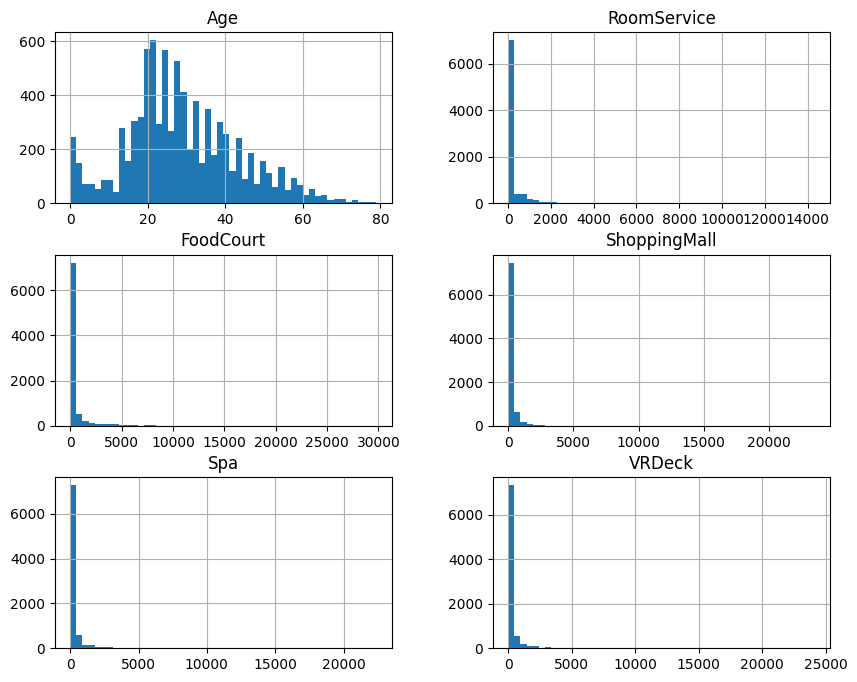

In [23]:
import matplotlib.pyplot as plt

initial_data.hist(bins=50, figsize=(10, 8))
plt.show()

We notice that the large values shifted the graphs to the right, pretty far from the mean value of the feature

Let's see if we find correlations between features and label. For that, we will use a correlation matrix.

In [24]:
corr_matrix = initial_data.corr()
corr_matrix["Transported"].sort_values(ascending=False)

/tmp/ipykernel_36420/2358535422.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = initial_data.corr()


Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

We observe that there are not so many correlations between these features and our label

Create train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, y_train, x_test, y_test = train_test_split(initial_data.loc[:, initial_data.columns != 'Transported'], initial_data['Transported'], test_size=0.2)

# There, I tried something, but it didn't quite work. I will learn how to fix it as soon as possible

It is time to logically transform some features. We observe that features `HomePlanet` and `Destination` have a few values.

In [25]:
initial_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [26]:
initial_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Since sklearn usually makes correlations between close numerical values, we don't want to make such confusions with our randomly distributed floats. For that, let's split these features into multiple ones, giving them values of only 0 and 1.
Option 1: use dummies

In [27]:
dummy = pd.DataFrame({'HomePlanet': ['Earth', 'Europa', 'Mars'], 'Destination': ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']})
pd.get_dummies(dummy)

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,0,0,0,0,1
1,0,1,0,1,0,0
2,0,0,1,0,1,0


Option 2: OneHotEncoder

In [28]:
from sklearn.preprocessing import OneHotEncoder

data_to_transform = initial_data[['HomePlanet', 'Destination']]
cat_encoder = OneHotEncoder()
data_1hot = cat_encoder.fit_transform(data_to_transform)

In [29]:
data_1hot.toarray()initial_data.select_dtypes(include=[np.number])

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [30]:
cat_encoder.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan], dtype=object)]

In [31]:
dataframe_1hot = pd.DataFrame(data_1hot,
                          columns=cat_encoder.get_feature_names_out(),
                          index=dummy.index)

ValueError: Shape of passed values is (8693, 1), indices imply (3, 8)

# The end of the part that didn't work

Now, we convert the non-numerical features into numerical ones

In [39]:
data_cat = initial_data[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported']]
data_cat.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,True


In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
type(data_cat_encoded)

numpy.ndarray

In [43]:
data_cat_output = pd.DataFrame(data_cat_encoded,
                          columns=ordinal_encoder.get_feature_names_out(),
                          index=data_cat.index)
data_cat_output.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported
0,0.0,1.0,0.0,2.0,0.0,0.0
1,1.0,0.0,0.0,2.0,0.0,1.0
2,2.0,1.0,0.0,2.0,1.0,0.0
3,3.0,1.0,0.0,2.0,0.0,0.0
4,4.0,0.0,0.0,2.0,0.0,1.0


Let's try to make a pipeline out of this

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer


num_attribs = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_attribs = ['HomePlanet', 'Destination']
bool_attribs = ['CryoSleep', 'VIP']

# we decide to ignore PassengerId and Cabin because they do not seem to have relevant numerical value

num_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
bool_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
    ("bool", bool_pipeline, bool_attribs)
])

In [60]:
x_train_prepared = preprocessing.fit_transform(x_train)
preprocessing.get_feature_names_out()

array(['num__Age', 'num__RoomService', 'num__FoodCourt',
       'num__ShoppingMall', 'num__Spa', 'num__VRDeck',
       'cat__HomePlanet_0.0', 'cat__HomePlanet_1.0',
       'cat__HomePlanet_2.0', 'cat__Destination_0.0',
       'cat__Destination_1.0', 'cat__Destination_2.0', 'bool__CryoSleep',
       'bool__VIP'], dtype=object)

In [65]:
from sklearn.linear_model import LinearRegression

# y_train_prepared = ColumnTransformer([("bool", bool_pipeline, ["Transported"])]).fit_transform(y_train)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet',
                                                   'Destination']),
                                                 ('bool',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['CryoSleep', 'VIP'])])),
                ('linearregression', LinearRegression())])

In [72]:
data_predictions = lin_reg.predict(x_train)
data_predictions[:1000].round(0)

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0., -0.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -0.,  1., -0.,  1.,  0.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1., -0.,  1.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0., -0.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1

Next up, we are asking whether we fill the missing values of the numerical features with their mean value or with 0, since more than 50% have this value. We decide to replace them with 0. In this sense, we decide to use a SimpleImputer

In [74]:
y_train.iloc[:500].values

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet',
                                                   'Destination']),
                                                 ('bool',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['CryoSleep', 'VIP'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [76]:
data_predictions2 = tree_reg.predict(x_train)
data_predictions2[:1000].round(0)

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0.

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent") # same as "constant" strategy

We include only the numerical features

In [45]:
data_num = initial_data.select_dtypes(include=[np.number])
type(data_num)

pandas.core.frame.DataFrame

In [46]:
data_all_num = pd.concat([data_cat_output, data_num], axis=1, join='inner')

In [47]:
imputer.fit(data_all_num)

SimpleImputer(strategy='most_frequent')

In [48]:
X = imputer.transform(data_all_num)

In [49]:
data_tr = pd.DataFrame(X, columns=data_all_num.columns,
                          index=data_all_num.index)

In [50]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   float64
 1   HomePlanet    8693 non-null   float64
 2   CryoSleep     8693 non-null   float64
 3   Destination   8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   Transported   8693 non-null   float64
 6   Age           8693 non-null   float64
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
dtypes: float64(12)
memory usage: 815.1 KB


Now, every entry has a value for each feature

A first step is achieved. We have a full set of float64 typed features, without missing rows.

Let's make a Random forest model

In [56]:

test_data = pd.read_csv("test.csv")

transform the test set as well

In [57]:
test_cat = test_data[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported']]
test_cat_encoded = ordinal_encoder.fit_transform(test_cat)
test_cat_output = pd.DataFrame(test_cat_encoded,
                          columns=ordinal_encoder.get_feature_names_out(),
                          index=test_cat.index)

KeyError: "['Transported'] not in index"

In [52]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X, y)

y_pred_rf = rnd_clf.predict(X)

In [54]:
for score, name in zip(rnd_clf.feature_importances_, data_tr.columns):
     print(round(score, 2), name)

0.01 PassengerId
0.07 HomePlanet
0.28 CryoSleep
0.01 Destination
0.0 VIP
0.02 Transported
0.17 Age
0.08 RoomService
0.07 FoodCourt
0.16 ShoppingMall
0.13 Spa
